# DreliaCalc Report

In [1]:
import datetime
datetime.datetime.now().strftime(format='%d.%m.%Y - %H:%M')

'30.01.2021 - 11:25'

In [2]:
%cd ../dmyplant2
!git pull --rebase

/Users/dieterchvatal/Documents/Anaconda/dmyplant2
Bereits aktuell.


In [3]:
%cd ../dReliaCalc
import dmyplant2
import pandas as pd
import numpy as np
from pprint import pprint as pp

/Users/dieterchvatal/Documents/Anaconda/dReliaCalc


In [6]:
dval = pd.read_csv("input.csv",sep=';', encoding='utf-8')
dval['val start'] = pd.to_datetime(dval['val start'], format='%d.%m.%Y')
failures = pd.read_csv("failures.csv",sep=';', encoding='utf-8')
failures['date'] = pd.to_datetime(failures['date'], format='%d.%m.%Y')

##included Validation Engines:

In [7]:
from dmyplant2 import cred
mp = dmyplant2.MyPlant(7200)
vl = dmyplant2.Validation(mp,dval, cui_log=False)                   

##Success Run Plot, beta=1.21 & 1.5 with failures 

In [8]:
d=vl.dashboard
d.sort_values(by = "oph parts",ascending=False)

,Name,Engine ID,Design Number,Engine Type,Engine Version,P,serialNumber,id,Count_OpHour,val start,oph@start,oph parts
27,ABINSK,M09,Y203,624,H01,24,1386177,130891,9034.0,2020-03-02,1845,7189.0
29,BLESSED TEXTILE,M01,Y386,620,J101,20,1393153,129039,14270.0,2020-03-23,7315,6955.0
2,ROCHE PENZBERG KWKK,M01,U233,624,H02,24,1184199,108532,31120.0,2020-04-27,25208,5912.0
16,BMW LANDSHUT 4.10,M04,U781,624,H01,24,1320072,117617,11946.0,2020-02-07,6316,5630.0
22,BMW DINGOLFING 2.4,M06,X263,624,H01,24,1352268,126032,10238.0,2020-05-04,5756,4482.0
14,BMW MÜNCHEN,M01,U779,624,H01,24,1320022,117551,8317.0,2020-06-08,3985,4332.0
6,ABINSK,M01,Y199,624,K01,24,1250575,156120,4915.0,2020-06-15,758,4157.0
28,ABINSK,M10,Y204,624,H01,24,1386260,130893,10349.0,2020-07-13,6240,4109.0
23,BMW DINGOLFING 2.4,M07,X263,624,H01,24,1352323,126008,9992.0,2020-06-22,6262,3730.0
18,BMW LANDSHUT 4.10,M03,U781,624,H01,24,1320114,117547,9828.0,2020-02-24,6494,3334.0


In [10]:
#failures = pd.DataFrame([])
from tabulate import tabulate
print(tabulate(failures))
#pd.options.display.max_columns = None
#failures

-  -------------------  -  -------  --------------------------------------
0  2020-12-28 00:00:00  1  1319151  München V008 M1 Z8 - cold scuff Reiber
-  -------------------  -  -------  --------------------------------------


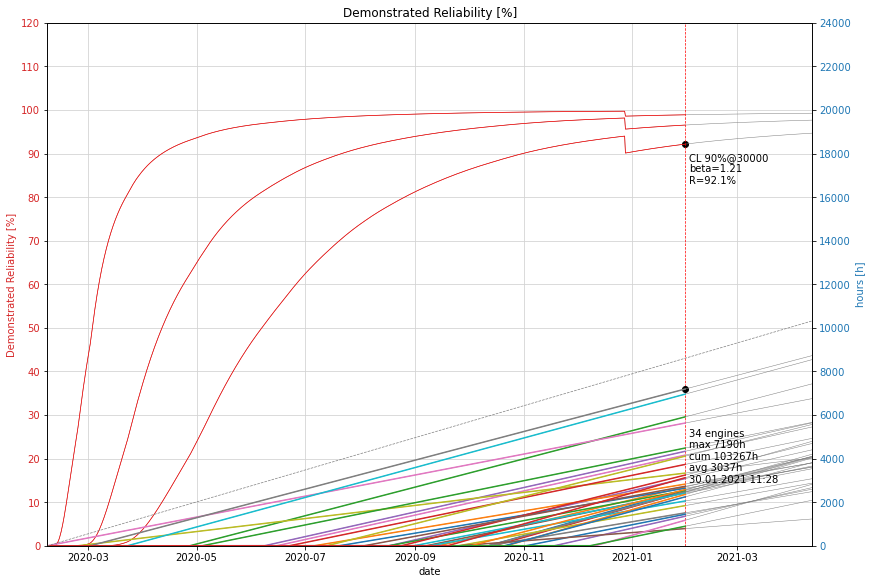

In [11]:
dmyplant2.demonstrated_Reliabillity_Plot(vl, 
            beta=1.21, T=30000, s=1000, ft=failures, cl=[10,50,90], factor=1.2)

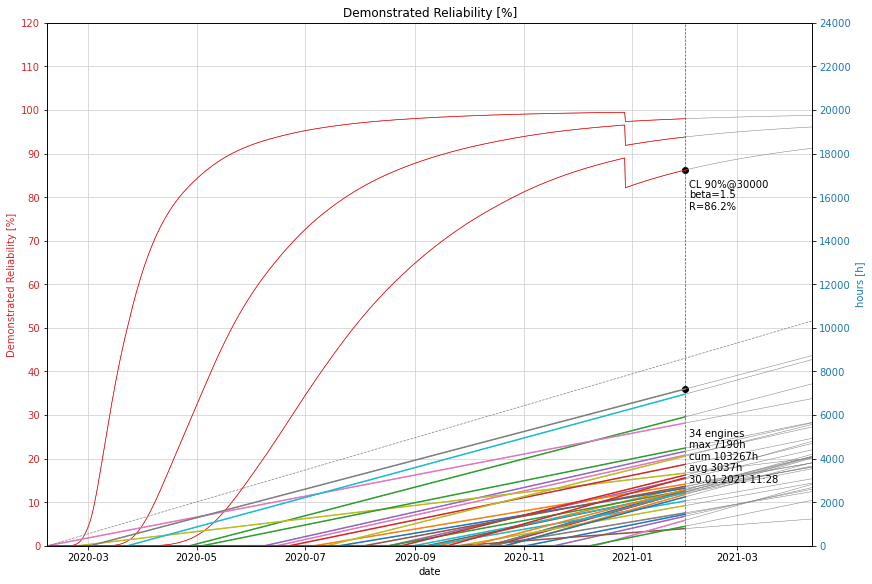

In [12]:
dmyplant2.demonstrated_Reliabillity_Plot(vl, 
            beta=1.5, T=30000, s=1000, ft=failures, cl=[10,50,90], factor=1.2)

In [13]:
##Success Run Plot, beta=1.21 & 1.5 without failures

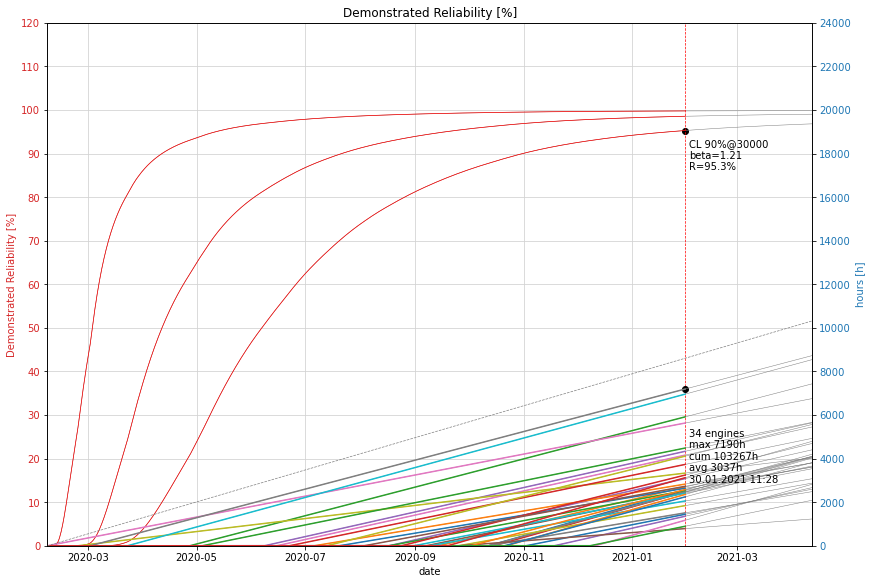

In [14]:
failures = pd.DataFrame([])
dmyplant2.demonstrated_Reliabillity_Plot(vl, 
            beta=1.21, T=30000, s=1000, ft=failures, cl=[10,50,90], factor=1.2)

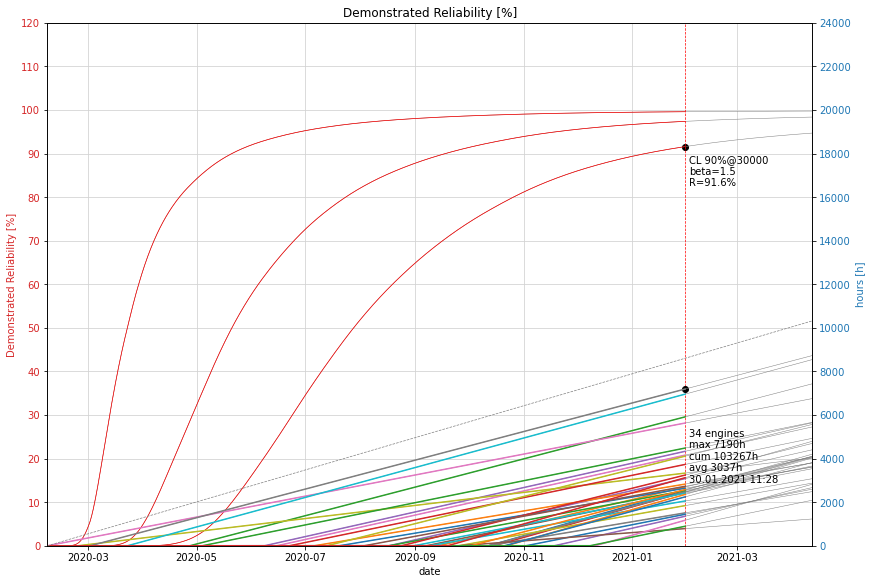

In [15]:
dmyplant2.demonstrated_Reliabillity_Plot(vl, 
            beta=1.5, T=30000, s=1000, ft=failures, cl=[10,50,90], factor=1.2)

<AxesSubplot:ylabel='Name'>

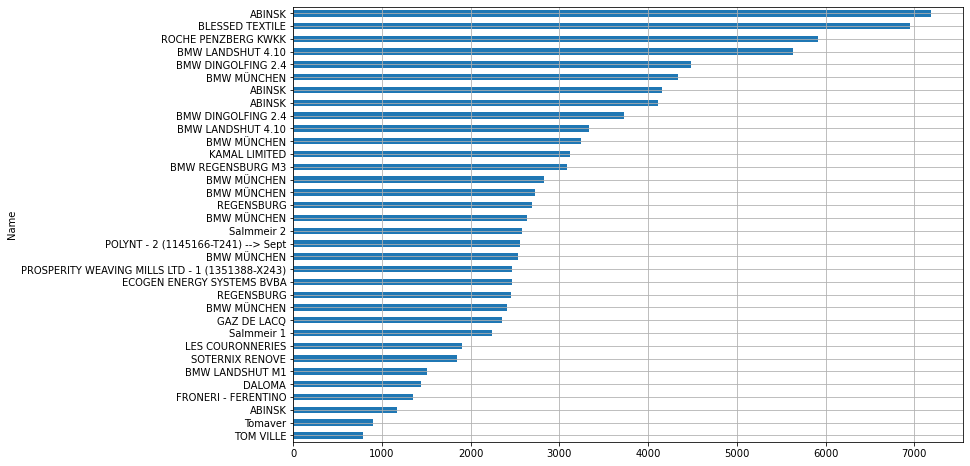

In [16]:
d[['Name','oph parts']].set_index('Name').sort_values(by = "oph parts",ascending=True)["oph parts"].plot.barh(figsize=(12,8),grid=True)

##Engines in oph ranges

In [17]:
#Calculate the number f engines in certain oph ranges
ranges = [0,2000,4000,6000,10000,30000]
#Method 1: using cut and groupby
#r = d.groupby(pd.cut(d['oph parts'], ranges)).count()
#r['id']

#Method 2: simpler, direct using pd.value_counts
d['oph parts'].value_counts(bins=ranges, sort=False)


(-0.001, 2000.0]       8
(2000.0, 4000.0]      18
(4000.0, 6000.0]       6
(6000.0, 10000.0]      2
(10000.0, 30000.0]     0
Name: oph parts, dtype: int64

##Statistics by Engine Type

In [18]:
d.groupby( "Engine Type")['oph parts'].describe().fillna(0).astype(int)

,count,mean,std,min,25%,50%,75%,max
Engine Type,,,,,,,,
612,1,1443,0,1443,1443,1443,1443,1443
616,9,2249,754,893,1841,2453,2694,3121
620,6,3024,2062,788,2438,2585,2780,6955
624,18,3513,1600,1167,2487,3287,4288,7189


##Statistics by Engine Version

In [19]:
d.groupby( "Engine Version")['oph parts'].describe().fillna(0).astype(int)

,count,mean,std,min,25%,50%,75%,max
Engine Version,,,,,,,,
F01,5,2619,159,2407,2533,2637,2694,2828
F03,1,893,0,893,893,893,893,893
F11,1,1841,0,1841,1841,1841,1841,1841
F12,1,2463,0,2463,2463,2463,2463,2463
H01,12,3666,1675,1167,2682,3532,4369,7189
H02,1,5912,0,5912,5912,5912,5912,5912
H12,1,1899,0,1899,1899,1899,1899,1899
J01,2,2766,443,2453,2609,2766,2923,3080
J101,2,5038,2711,3121,4079,5038,5996,6955


In [20]:
#import datetime
#datetime.datetime.now()
#import arrow

In [30]:
name="MÜNCHEN"
#ee = [e for e in vl.engines if name in e._d['Name']] 
ee = vl.eng_name(name)

for i, e in enumerate(ee):
    print(f"{i:02d} {e} {e.historical_dataItem(161, pd.to_datetime('28.12.2020', format='%d.%m.%Y').timestamp())} oph")



00 1319133 M04 BMW MÜNCHEN             6428.0 oph
01 1319138 M02 BMW MÜNCHEN             6427.0 oph
02 1319151 M01 BMW MÜNCHEN             6427.0 oph
03 1319157 M03 BMW MÜNCHEN             6479.0 oph
04 1319997 M02 BMW MÜNCHEN             7527.0 oph
05 1320022 M01 BMW MÜNCHEN             7538.0 oph
06 1320030 M03 BMW MÜNCHEN             7641.0 oph


##Engine Versions to Engine Type Table (Pivot Example)

In [31]:
d_subset=d.groupby('Engine Type').head(100)
d_subset.pivot(columns='Engine Type',values='Engine Version').fillna('')

Engine Type,612,616,620,624
0,,,,H01
1,,F01,,
2,,,,H02
3,,F12,,
4,,J01,,
5,,J01,,
6,,,,K01
7,,,,K505
8,,F11,,
9,,,F01,


##Running hours vs Engine Version & Engine Type

In [32]:
d_subset.pivot_table(index='Engine Version', columns='Engine Type', values='oph parts', aggfunc=['count','sum'], margins=True).fillna('')

count                   sum                               
Engine Type      612 616 620 624 All   612    616    620    624       All
Engine Version                                                           
F01                    1   4       5         2694  10405          13099.0
F03                    1           1          893                   893.0
F11                    1           1         1841                  1841.0
F12                    1           1         2463                  2463.0
H01                           12  12                      43999   43999.0
H02                            1   1                       5912    5912.0
H12                            1   1                       1899    1899.0
J01                    2           2         5533                  5533.0
J101                   1   1       2         3121   6955          10076.0
J11                    1           1         1352                  1352.0
J12                1   1   1       3  1443   2352    788           4583.0
K01                            3   3                       8972    8972.0
K505                           1   1                       2466    2466.0
All                1   9   6  18  34  1443  20249  18148  63248  103088.0

##Overall oph Statistics

<AxesSubplot:>

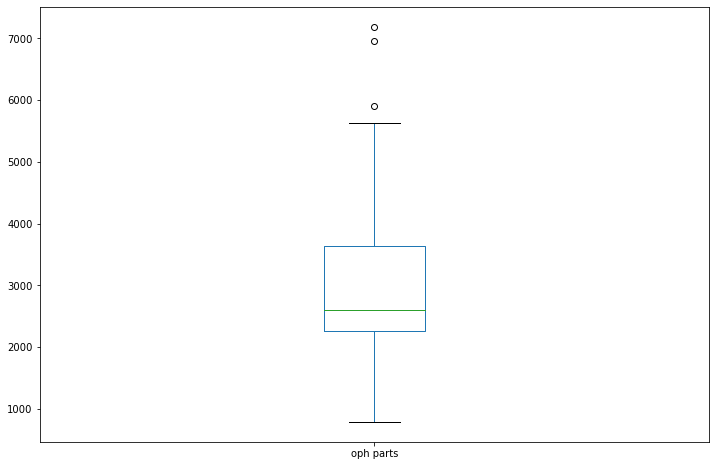

In [33]:
d[["oph parts"]].plot.box(figsize=(12,8))

In [34]:
d['oph parts'].describe().astype(int)

count      34
mean     3032
std      1572
min       788
25%      2268
50%      2606
75%      3631
max      7189
Name: oph parts, dtype: int64

<AxesSubplot:xlabel='Engine Type', ylabel='oph'>

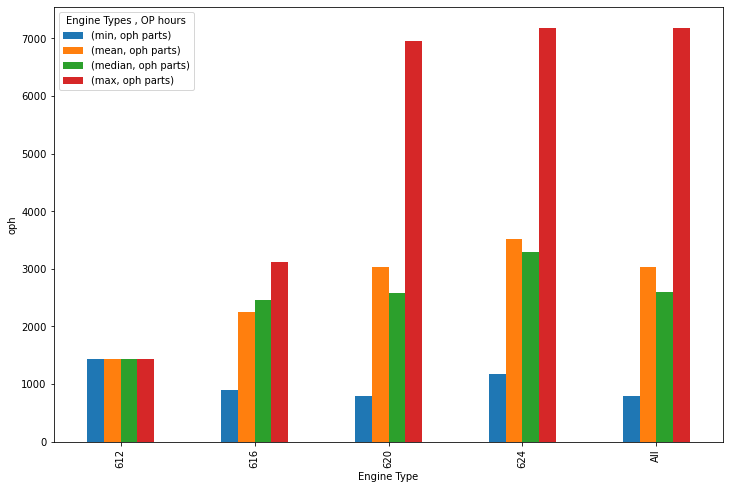

In [35]:
# lambda x: np.percentile(x, 50)
def median(x):
    return np.percentile(x,50)
d1 = d.pivot_table(index='Engine Type', values='oph parts', aggfunc=['min','mean',median,'max'], margins=True)
d1.columns=d1.columns.rename('Engine Types ', level=0)
d1.columns=d1.columns.rename(' OP hours', level=1)
d1.plot.bar(figsize=(12,8), ylabel='oph')
#d.pivot_table(index='Engine Type', values='oph parts', aggfunc=['min','mean',median,'max'], margins=True).columns.rename('A', level=0).plot.bar(figsize=(12,8), ylabel='oph', title='ophours vs engine types')

In [36]:
d.pivot_table(index='Engine Type', values='oph parts', aggfunc=['min','mean',median,'max'], margins=True).astype(int)

,min,mean,median,max
,oph parts,oph parts,oph parts,oph parts
Engine Type,,,,
612,1443,1443,1443,1443
616,893,2249,2453,3121
620,788,3024,2585,6955
624,1167,3513,3287,7189
All,788,3032,2606,7189


##Pivot Cum Validation hours per Engine Type

<AxesSubplot:xlabel='Engine Type', ylabel='oph'>

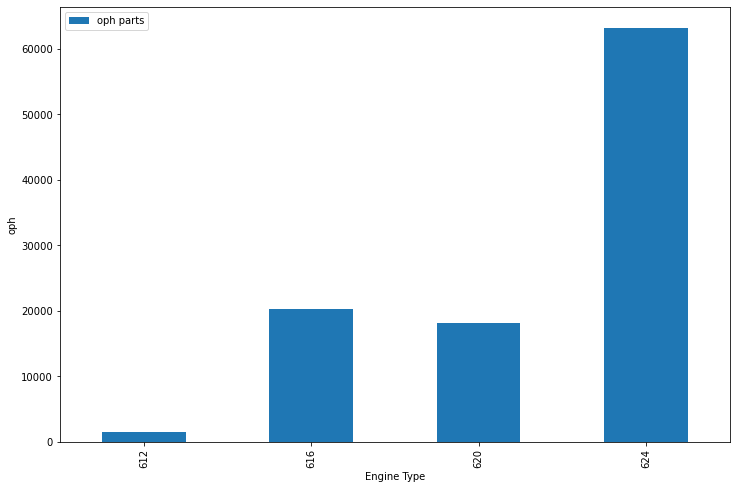

In [37]:
d.pivot_table(index='Engine Type', values='oph parts', aggfunc='sum', margins=False).plot.bar(figsize=(12,8), ylabel='oph')

In [38]:
#Example stack all Vector's of a dataset
#d.melt()